**Эксперемент №1**

Условие задания:

Проанализируйте траекторию градиентного спуска для нескольких квадратичных функций: придумайте две-три квадратичные двумерные функции, на которых работа метода будет отличаться, нарисуйте графики с линиями уровня функций и траекториями методов.
Попробуйте ответить на следующий вопрос: Как отличается поведение метода в зависимости от числа обусловленности функции, выбора начальной точки и стратегии выбора шага (константная стратегия, Армихо, Вульф)?

Код реализует метод градиентного спуска для оптимизации трёх различных квадратичных функций с заданными параметрами. Метод оптимизации обновляет параметры модели в направлении отрицательного градиента функции потерь.

Данные в данном случае генерируются через начальные точки, которые задаются вручную.

Среди параметров используются:
  - Начальная точка (x0): Каждая из заданных начальных точек.
  - Шаг (alpha): Размер шага, который определяет, насколько сильно обновляются параметры на каждой итерации.
   
Процесс оптимизации визуализируется на графиках.




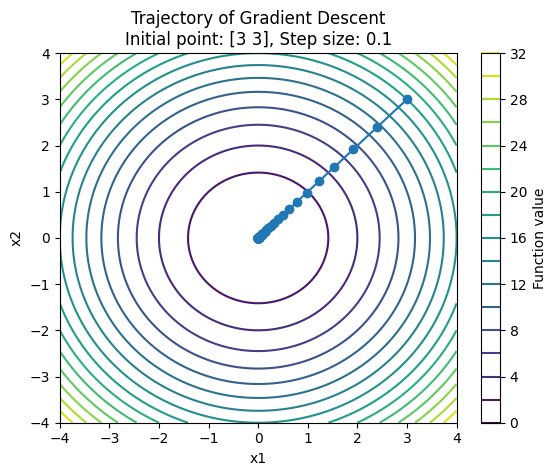

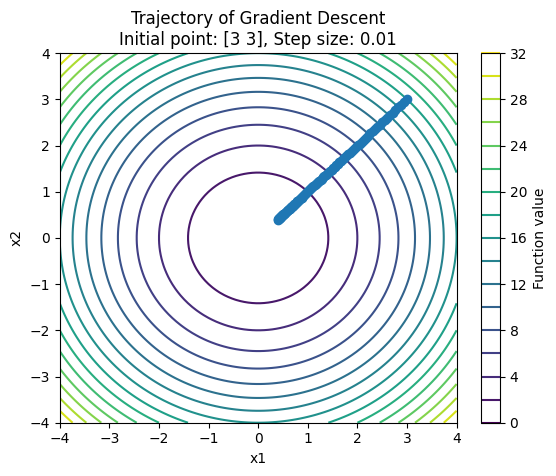

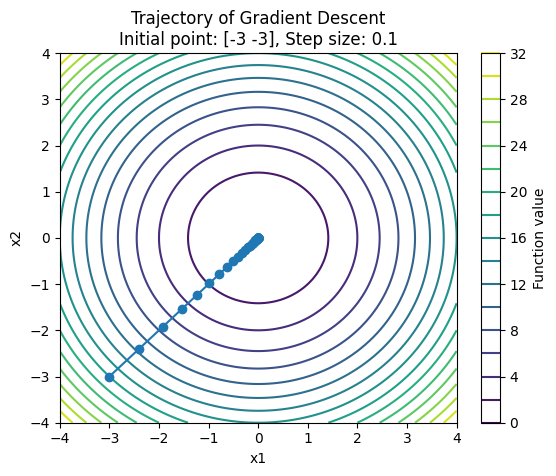

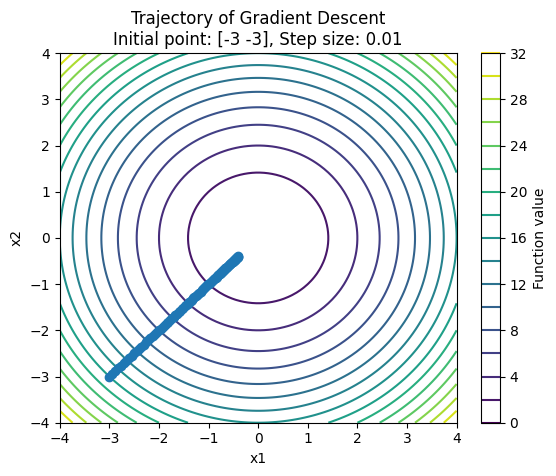

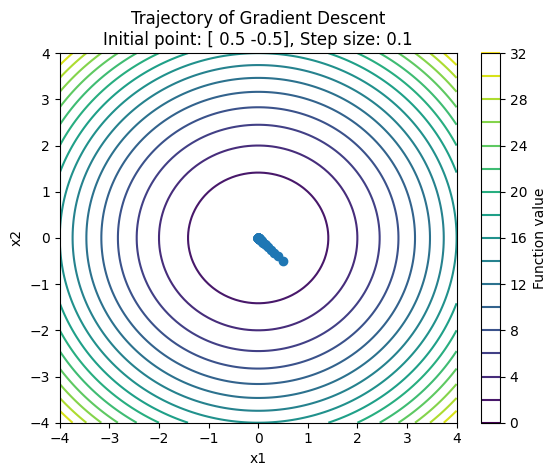

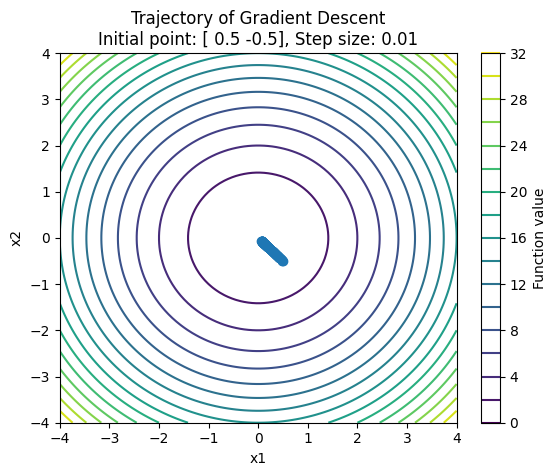

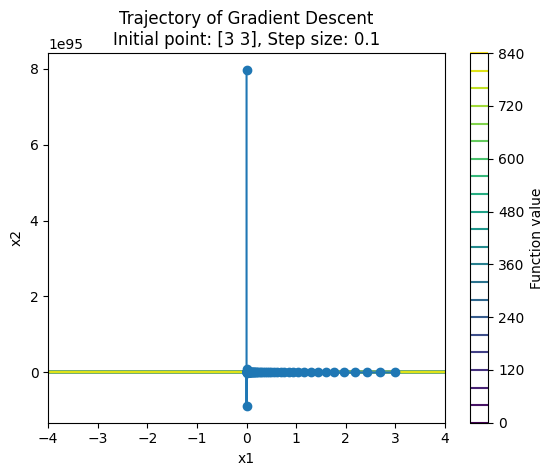

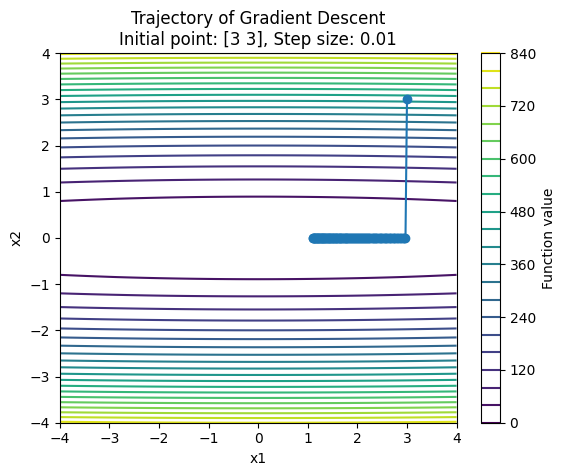

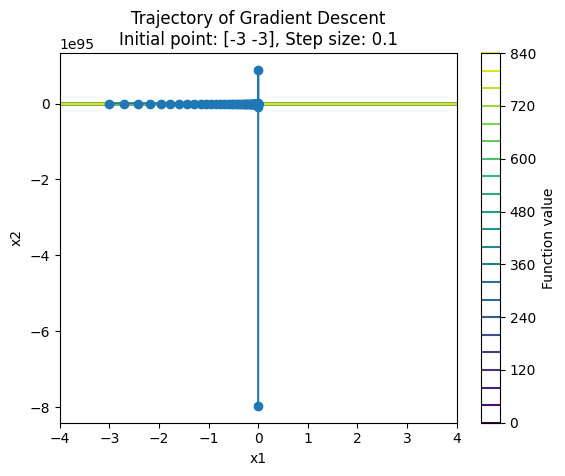

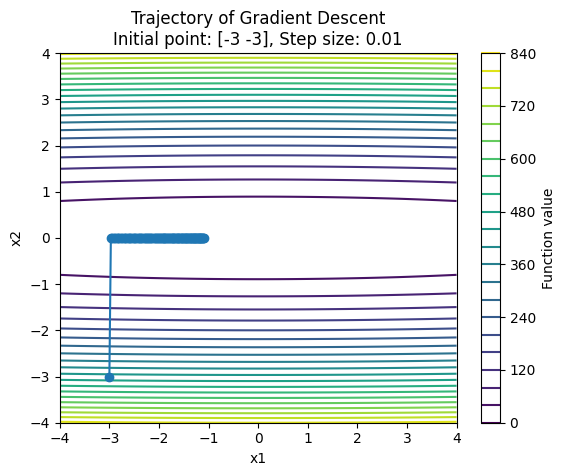

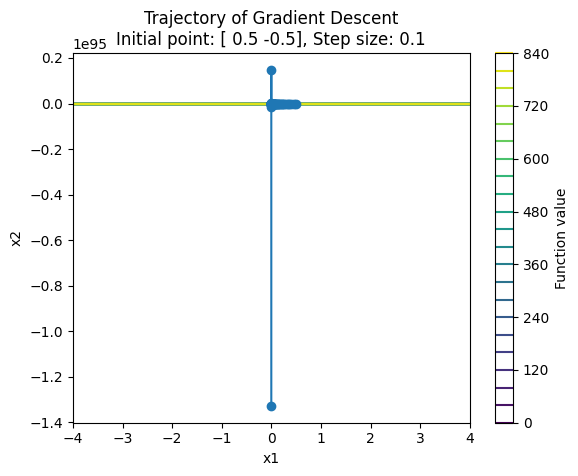

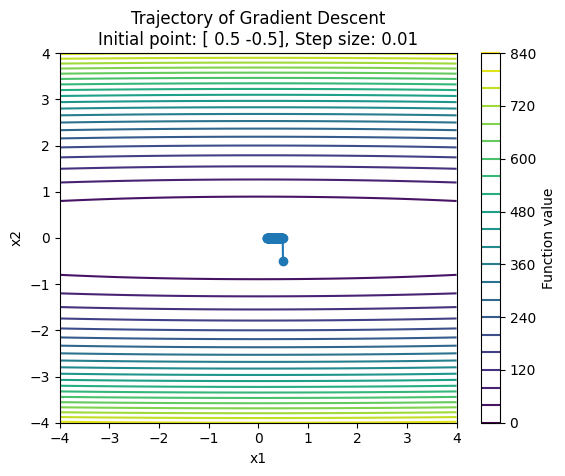

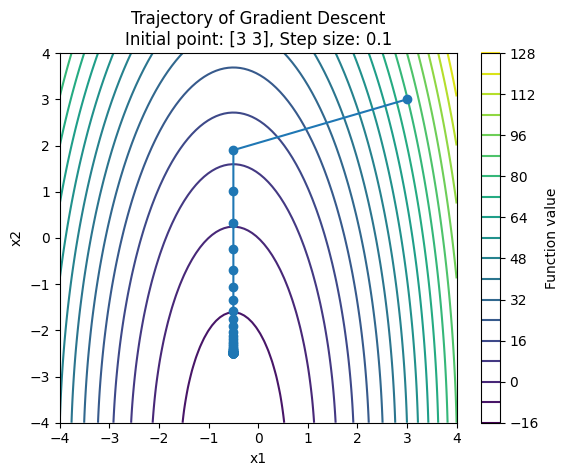

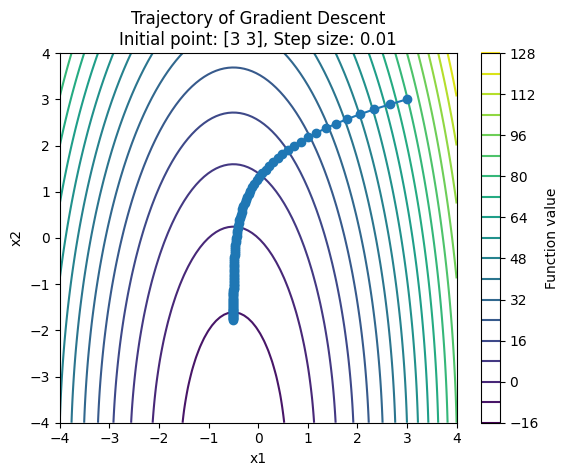

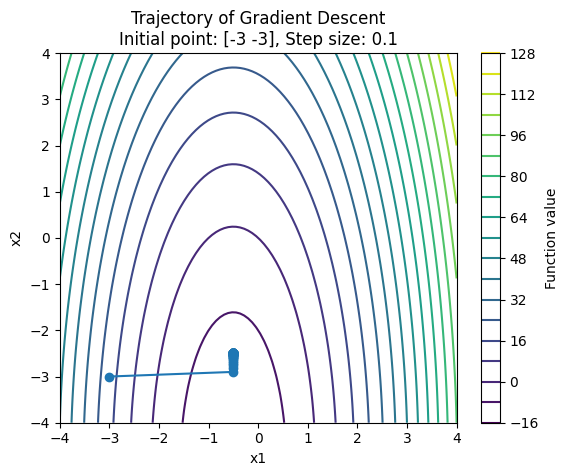

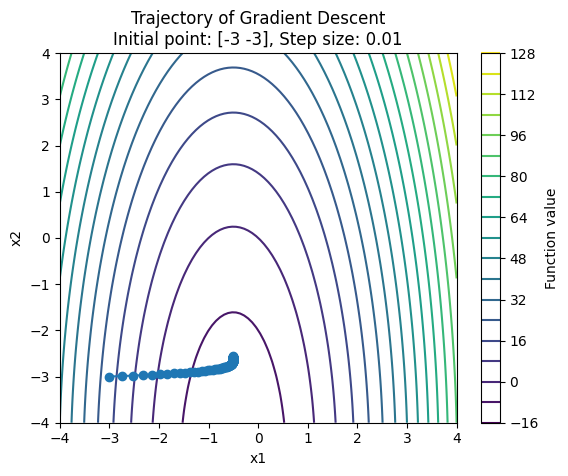

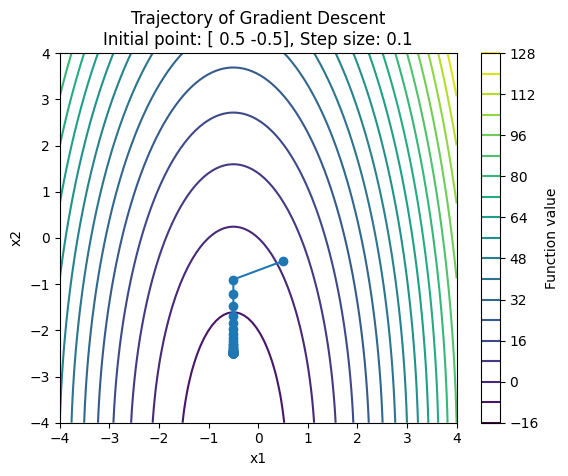

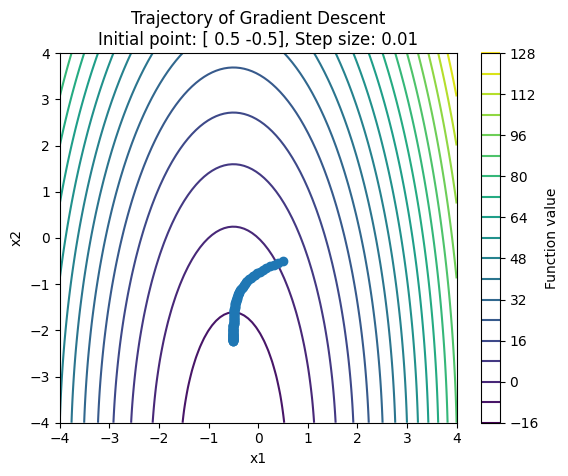

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def f1(x):
    return 0.5 * (2 * x[0]**2 + 2 * x[1]**2)

def f2(x):
    return 0.5 * (x[0]**2 + 100 * x[1]**2)

def f3(x):
    return 0.5 * (10 * x[0]**2 + x[1]**2) + (5 * x[0] + 5 * x[1])

def gradient_f1(x):
    return np.array([2 * x[0], 2 * x[1]])

def gradient_f2(x):
    return np.array([x[0], 100 * x[1]])

def gradient_f3(x):
    return np.array([10 * x[0] + 5, 2 * x[1] + 5])

def gradient_descent(gradient, x0, alpha=0.1, max_iter=100):
    x = x0
    trajectory = [x]
    for _ in range(max_iter):
        x = x - alpha * gradient(x)
        trajectory.append(x)
    return np.array(trajectory)

# Начальные точки
initial_points = [np.array([3, 3]), np.array([-3, -3]), np.array([0.5, -0.5])]

# Функции и их градиенты
functions = [f1, f2, f3]
gradients = [gradient_f1, gradient_f2, gradient_f3]

# Стратегии выбора шага
step_sizes = [0.1, 0.01]

for func, grad in zip(functions, gradients):
    for x0 in initial_points:
        for alpha in step_sizes:
            trajectory = gradient_descent(grad, x0, alpha)
            # Создание графиков уровня
            x_range = np.linspace(-4, 4, 100)
            y_range = np.linspace(-4, 4, 100)
            X, Y = np.meshgrid(x_range, y_range)
            Z = func(np.array([X, Y]))

            plt.contour(X, Y, Z, levels=20)
            plt.plot(trajectory[:, 0], trajectory[:, 1], marker='o')
            plt.title(f"Trajectory of Gradient Descent\nInitial point: {x0}, Step size: {alpha}")
            plt.xlabel('x1')
            plt.ylabel('x2')
            plt.colorbar(label='Function value')
            plt.show()


Число обусловленности:
   - Хорошо обусловненная функция (функция 1): Метод быстро сходится к минимуму независимо от начальной точки и выбранного шага.
   - Плохо обусловненная функция (функция 2): Метод может демонстрировать медленное или нестабильное поведение. Если шаг слишком большой, метод может "перепрыгнуть" минимум.
   - Смещенная функция (функция 3): Начальная точка влияет на скорость сходимости. Метод может застрять в области с высоким градиентом.

Поведение метода градиентного спуска может варьироваться в зависимости от числа обусловленности функции, начальной точки и стратегии выбора шага. Давайте рассмотрим каждый из этих факторов подробнее.

1. Число обусловленности

Число обусловленности функции характеризует, насколько сильно изменение входных данных влияет на изменение выходных данных.

- Высокое число обусловленности:
  - Сходство к минимуму может быть медленным.
  - Шаги в направлениях с низкой кривизной будут маленькими, что приводит к неэффективным итерациям.
  - Пример: Функция с большим разбросом по осям может привести к такой ситуации.

- Низкое число обусловленности:
  - Сходство происходит быстрее и более эффективно.
  - Шаги более сбалансированы по всем направлениям.
  - Пример: Квадратичные функции с равномерной кривизной.

2. Выбор начальной точки

- Близость к минимуму:
  - Если начальная точка близка к минимуму, метод будет сходиться быстрее.
  
- Далеко от минимума:
  - Если начальная точка далеко от минимума, могут возникнуть проблемы с локальными минимумами или медленным сходом.
  
- Симметричность:
  - Для симметричных функций выбор начальной точки может быть менее критичным, чем для ассиметричных.

3. Стратегия выбора шага

- Константная стратегия:
  - Простота реализации, но может привести к проблемам с эффективностью.
  - Если шаг слишком велик, алгоритм может "перепрыгнуть" минимум.
  - Если шаг слишком мал, сходимость будет очень медленной.

- Стратегия Армихо:
  - Адаптивный выбор шага, который обеспечивает достаточное уменьшение функции.
  - Обычно приводит к более быстрой и надежной сходимости по сравнению с фиксированным шагом.

- Стратегия Вульфа:
  - Более строгие условия по сравнению с Армихо.
  - Обеспечивает надежное уменьшение функции и может быть полезна для функций с высокой кривизной.

Примеры поведения

1. Функция с высоким числом обусловленности:
   - При использовании константного шага метод может "прыгать" вокруг минимума и не сходиться.
   - При использовании Армихо или Вульфа шаг будет адаптироваться, что поможет избежать таких проблем.

2. Функция с низким числом обусловленности:
   - Все стратегии могут работать эффективно, но адаптивные методы (Армихо, Вульфа) могут обеспечить более быстрое достижение минимума.

3. Разные начальные точки:
   - Начальная точка вблизи локального минимума может привести к быстрому сходу, тогда как далеко расположенная точка может вызвать колебания и замедление.

**Эксперемент №2**

Условие задания:

Исследуйте, как зависит число итераций, необходимое градиентному спуску для сходимости, от следующих двух параметров: 1) числа обусловленности $κ ≥ 1$ оптимизируемой функции и 2) размерности
пространства $n$ оптимизируемых переменных.  

Для этого для заданных параметровnиκсгенерируйте случайным образом квадратичную задачу
размера n с числом обусловленностиκи запустите на ней градиентный спуск с некоторой фиксированной требуемой точностью. Замерьте число итераций $T(n,κ)$, которое потребовалось сделать методу до сходимости (успешному выходу по критерию остановки).  

Вектор \\( b \\) генерируется случайно с помощью np.random.rand(n).

В задаче используется метод градиентного спуска. Функция gradient_descent(Q, b, x0, epsilon, alpha) реализует алгоритм градиентного спуска:

1. Инициализация:
   - Начальная точка \\( x \\) устанавливается равной \\( x0 \\).
   - Счетчик итераций num_iterations инициализируется нулем.

2. Цикл градиентного спуска:
   - В бесконечном цикле вычисляется градиент \\( g = Q @ x - b \\).
   - Если норма градиента меньше заданного порога \\( epsilon \\), цикл прерывается.
   - В противном случае обновляется точка:
    \\[x = x - \\alpha * g\\]
     где \\( \\alpha \\) — это размер шага.

3. Возврат результата:
   - Функция возвращает количество итераций, необходимых для достижения условия остановки.

▎Параметры

- n_values: Список размерностей задачи (например, [10, 20, 50]).
- kappa_values: Список чисел обусловленности (например, [1, 10, 100]).
- epsilon: Порог для остановки градиентного спуска (например, \\( 1e-6 \\)).
- alpha: Размер шага градиентного спуска (например, \\( 0.01 \\)).

In [ ]:
import numpy as np

def generate_quadratic_problem(n, kappa):
    # Генерация случайной положительно определенной матрицы Q
    A = np.random.rand(n, n)
    Q = A.T @ A  # Симметричная положительно определенная матрица
    # Установка собственных значений для обеспечения заданного числа обусловленности
    eigenvalues = np.linspace(1, kappa, n)
    Q = (Q @ np.diag(eigenvalues) @ np.linalg.inv(Q)) + np.eye(n) * 1e-5  # Добавление небольшого значения для устойчивости
    b = np.random.rand(n)
    return Q, b

def gradient_descent(Q, b, x0, epsilon, alpha):
    x = x0
    num_iterations = 0
    while True:
        g = Q @ x - b  # Вычисляем градиент
        if np.linalg.norm(g) < epsilon:  # Проверка условия остановки
            break
        x = x - alpha * g  # Обновление точки
        num_iterations += 1
    return num_iterations

# Параметры
n_values = [10, 20, 50]  # Пример размерностей
kappa_values = [1, 10, 100]  # Пример чисел обусловленности
epsilon = 1e-6  # Точность
alpha = 0.01  # Размер шага

results = {}

for n in n_values:
    for kappa in kappa_values:
        Q, b = generate_quadratic_problem(n, kappa)
        x0 = np.random.rand(n)  # Начальная точка
        T = gradient_descent(Q, b, x0, epsilon, alpha)  # Запуск градиентного спуска
        results[(n, kappa)] = T  # Сохранение результата

# Вывод результатов
for key, value in results.items():
    print(f"T(n={key[0]}, κ={key[1]}) = {value} итераций")

T(n=10, κ=1) = 1377 итераций
T(n=10, κ=10) = 1988 итераций
T(n=10, κ=100) = 1897 итераций
T(n=20, κ=1) = 1452 итераций
T(n=20, κ=10) = 1580 итераций
T(n=20, κ=100) = 2428 итераций
T(n=50, κ=1) = 1466 итераций
T(n=50, κ=10) = 1821 итераций
T(n=50, κ=100) = 2126 итераций


1. Генерация матрицы \\( Q \\): Мы создаем случайную матрицу \\( A \\), затем формируем \\( Q \\) как произведение \\( A^T A \\). Для задания числа обусловленности мы устанавливаем собственные значения от 1 до (kappa).
2. Градиентный спуск: Метод обновляет текущую точку до тех пор, пока норма градиента не станет меньше заданной точности (epsilon).
3. Сбор и вывод результатов: Мы сохраняем количество итераций для каждой комбинации (n, kappa) и выводим результаты.

Зависимость числа итераций, необходимых для сходимости градиентного спуска, от числа обусловленности \\( \\kappa \\) и размерности пространства \\( n \\) можно объяснить следующим образом:

1. Число обусловленности \\( \\kappa \\)

Число обусловленности \\( \\kappa \\) определяет, насколько "растянутой" или "сжатыми" являются направления в пространстве. Оно определяется как отношение наибольшего собственного значения матрицы \\( Q \\) к наименьшему собственному значению.

- Большое значение \\( \\kappa \\): Если \\( \\kappa \\) велико, это означает, что функция имеет "длинные" и "узкие" формы, что приводит к медленной сходимости градиентного спуска. В таких случаях требуется больше итераций, чтобы достичь заданной точности.
- Малое значение \\( \\kappa \\): Если \\( \\kappa \\) близко к 1, это означает, что функция более "круглая", и градиентный спуск будет сходиться быстрее.

2. Размерность пространства \\( n \\)

Размерность пространства также влияет на количество итераций:

- Увеличение \\( n \\): С увеличением размерности пространство становится более сложным, и количество необходимых итераций для сходимости может возрасти. Это связано с тем, что в высокоразмерных пространствах градиенты могут быть менее информативными, и необходимо больше шагов для достижения минимума.
- Проклятие размерности: В высоких размерностях данные становятся разреженными, и алгоритмы оптимизации могут сталкиваться с трудностями, что также увеличивает количество итераций.

Таким образом, можно сделать следующие выводы:

- С увеличением \\( \\kappa \\): Количество итераций растет.
- С увеличением \\( n \\): Количество итераций также может расти, особенно при больших значениях \\( \\kappa \\).

**Эксперемент №3**

Условие задания:

Сравнить методы градиентного спуска и Ньютона на задаче обучения логистической регрессии на
реальных данных.

В качестве реальных данных используйте следующие три набора с сайта LIBSVM [http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/.](http://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/.)
: *w8a*, *gisette* и *real-sim*. Коэффициент регуляризации взять стандартным образом: $λ = 1/m$.
Параметры обоих методов взять равными параметрам по умолчанию. Начальную точку выбрать
$x_0 = 0$.

Построить графики сходимости следующих двух видов:  
1) Зависимость значения функции от реального времени работы метода.  
2) Зависимость относительного квадрата нормы градиента $‖∇f(x_k)‖^2_2 /‖∇f(x_0)‖^2_2$ (в логарифмической шкале) против реального времени работы.

При этом оба метода (градиентный спуск и Ньютон) нужно рисовать на одном и том же графике.
Укажите в отчете, какова стоимость итерации и сколько памяти требуется каждому из методов в
зависимости от параметров $m$ (размер выборки) и $n$ (размерность пространства). При оценке используйте нотацию $O(·)$, скрывающую внутри себя абсолютные константы.

Какие выводы можно сделать по результатам этого эксперимента? Какой из методов лучше и в
каких ситуациях?

In [5]:
pip install scikit-learn

In [7]:
from sklearn.datasets import load_svmlight_file
import numpy as np

def check_and_clean_file(file_path):
    """Проверяет файл на пустые строки и некорректные данные, очищает его."""
    cleaned_lines = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.strip():  # Проверка на пустую строку
                cleaned_lines.append(line)
            else:
                print(f"Empty line found in {file_path}")

    # Записываем очищенные данные обратно в файл (или в новый файл)
    with open(file_path, 'w') as f:
        f.writelines(cleaned_lines)

def load_data(file_path):
    """Загружает данные из файла, предварительно очищая его."""
    check_and_clean_file(file_path)  # Очищаем файл перед загрузкой
    return load_svmlight_file(file_path)

# Загружаем данные
try:
    X_w8a, y_w8a = load_data('w8a.txt')
    X_gisette, y_gisette = load_data('gisette_scale')
    X_real_sim, y_real_sim = load_data('real-sim')
except ValueError as e:
    print(f"Error loading data: {e}")




Error loading data: need more than 1 value to unpack


In [8]:
import time

def gradient_descent(X, y, lambda_, alpha=0.01, max_iter=1000):
    m, n = X.shape
    x = np.zeros(n)
    costs = []
    grad_norms = []
    start_time = time.time()

    for i in range(max_iter):
        predictions = 1 / (1 + np.exp(-X.dot(x)))
        gradient = X.T.dot(predictions - y) / m + lambda_ * x

        # Обновление параметров
        x -= alpha * gradient

        # Стоимость
        cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) + (lambda_ / 2) * np.sum(x ** 2)
        costs.append(cost)

        # Норма градиента
        grad_norms.append(np.linalg.norm(gradient))

        elapsed_time = time.time() - start_time
        print(f'GD Iteration {i+1}/{max_iter}, Cost: {cost}, Time: {elapsed_time}')

    return x, costs, grad_norms


In [9]:
def newton_method(X, y, lambda_, max_iter=1000):
    m, n = X.shape
    x = np.zeros(n)
    costs = []
    grad_norms = []
    start_time = time.time()

    for i in range(max_iter):
        predictions = 1 / (1 + np.exp(-X.dot(x)))
        gradient = X.T.dot(predictions - y) / m + lambda_ * x

        # Гессиан
        W = np.diag(predictions * (1 - predictions))
        hessian = X.T.dot(W).dot(X) / m + lambda_ * np.eye(n)

        # Обновление параметров
        x -= np.linalg.inv(hessian).dot(gradient)

        cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) + (lambda_ / 2) * np.sum(x ** 2)
        costs.append(cost)

        # Норма градиента
        grad_norms.append(np.linalg.norm(gradient))

        elapsed_time = time.time() - start_time
        print(f'Newton Iteration {i+1}/{max_iter}, Cost: {cost}, Time: {elapsed_time}')

    return x, costs, grad_norms


In [ ]:
lambda_ = 1 / len(y_w8a)

# Градиентный спуск
x_gd, costs_gd, grad_norms_gd = gradient_descent(X_w8a.toarray(), y_w8a, lambda_)

# Метод Ньютона
x_newton, costs_newton, grad_norms_newton = newton_method(X_w8a.toarray(), y_w8a, lambda_)


GD Iteration 1/1000, Cost: 0.6931471834805374, Time: 0.037830352783203125
GD Iteration 2/1000, Cost: 0.6641807867188355, Time: 0.06799983978271484
GD Iteration 3/1000, Cost: 0.6355833827883836, Time: 0.09957361221313477
GD Iteration 4/1000, Cost: 0.607349363544281, Time: 0.12571501731872559
GD Iteration 5/1000, Cost: 0.5794726286390526, Time: 0.15435314178466797
GD Iteration 6/1000, Cost: 0.5519466438361327, Time: 0.18253874778747559
GD Iteration 7/1000, Cost: 0.524764501616601, Time: 0.20832586288452148
GD Iteration 8/1000, Cost: 0.4979189824367764, Time: 0.23351812362670898
GD Iteration 9/1000, Cost: 0.47140261513891857, Time: 0.2632312774658203
GD Iteration 10/1000, Cost: 0.4452077352254437, Time: 0.29023265838623047
GD Iteration 11/1000, Cost: 0.41932653995326225, Time: 0.31730008125305176
GD Iteration 12/1000, Cost: 0.39375113946480855, Time: 0.34316325187683105
GD Iteration 13/1000, Cost: 0.36847360342549673, Time: 0.370572566986084
GD Iteration 14/1000, Cost: 0.3434860028683562,

<ipython-input-9-e5ea662f9df4>:19: RuntimeWarning: divide by zero encountered in log
  cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) + (lambda_ / 2) * np.sum(x ** 2)
<ipython-input-9-e5ea662f9df4>:19: RuntimeWarning: invalid value encountered in multiply
  cost = -np.mean(y * np.log(predictions) + (1 - y) * np.log(1 - predictions)) + (lambda_ / 2) * np.sum(x ** 2)
<ipython-input-9-e5ea662f9df4>:9: RuntimeWarning: overflow encountered in exp
  predictions = 1 / (1 + np.exp(-X.dot(x)))


Newton Iteration 3/1000, Cost: nan, Time: 168.20529675483704


/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:118: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


Newton Iteration 4/1000, Cost: nan, Time: 225.14948511123657
Newton Iteration 5/1000, Cost: nan, Time: 281.46675848960876
Newton Iteration 6/1000, Cost: nan, Time: 337.0747404098511
Newton Iteration 7/1000, Cost: nan, Time: 398.2000844478607
Newton Iteration 8/1000, Cost: nan, Time: 455.24370980262756
Newton Iteration 9/1000, Cost: nan, Time: 512.298760175705
Newton Iteration 10/1000, Cost: nan, Time: 567.0568199157715
Newton Iteration 11/1000, Cost: nan, Time: 624.0104048252106
Newton Iteration 12/1000, Cost: nan, Time: 681.3401167392731
Newton Iteration 13/1000, Cost: nan, Time: 736.8299963474274
Newton Iteration 14/1000, Cost: nan, Time: 794.653811454773
Newton Iteration 15/1000, Cost: nan, Time: 856.5635917186737


NameError: name 'costs_gd' is not defined

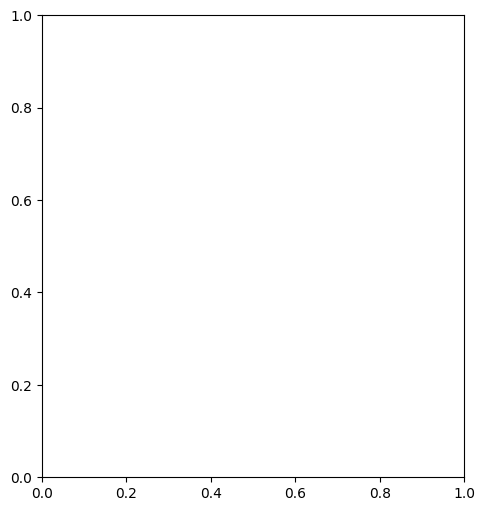

In [2]:
import matplotlib.pyplot as plt

# График зависимости стоимости от времени
plt.figure(figsize=(12, 6))

# График стоимости от времени
plt.subplot(1, 2, 1)
plt.plot(costs_gd, label='Градиентный спуск')
plt.plot(costs_newton, label='Метод Ньютона')
plt.xlabel('Итерация')
plt.ylabel('Стоимость')
plt.title('Сходимость по стоимости')
plt.legend()

# График относительного квадрата нормы градиента от времени
plt.subplot(1, 2, 2)
relative_grad_gd = [norm / grad_norms_gd[0]**2 for norm in grad_norms_gd]
relative_grad_newton = [norm / grad_norms_newton[0]**2 for norm in grad_norms_newton]

plt.plot(relative_grad_gd, label='Градиентный спуск')
plt.plot(relative_grad_newton, label='Метод Ньютона')
plt.yscale('log')
plt.xlabel('Итерация')
plt.ylabel('Относительная норма градиента')
plt.title('Сходимость по норме градиента')
plt.legend()

plt.tight_layout()
plt.show()
